In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Introducing NBEATSx to Realized Volatility Forecasting (Research)/Main/Robust Tests/European Stock/STOXX50E Realized Volatility.xlsx",index_col='Date',parse_dates=True)


# Hyperparameter search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [ ]:
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []


In [ ]:
from numpy.random import seed
seed(1052023)

In [ ]:
from random import randrange
print(randrange(1))

0


In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
75/75 [==============================] - 3s 8ms/step - loss: 0.0036 - acc: 0.0021
Epoch 2/5
75/75 [==============================] - 0s 5ms/step - loss: 0.0030 - acc: 0.0021
Epoch 3/5
75/75 [==============================] - 0s 5ms/step - loss: 0.0028 - acc: 0.0021
Epoch 4/5
75/75 [==============================] - 0s 5ms/step - loss: 0.0026 - acc: 0.0021
Epoch 5/5
1/1 [==============================] - 0s 24ms/step
Epoch: 5 | Inputs: 21 | Nodes: 14 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.002560040698566508 | Accuracy: 42.348404609061184
Epoch 1/5
70/70 [==============================] - 3s 15ms/step - loss: 0.0044 - acc: 0.0022
Epoch 2/5
70/70 [==============================] - 1s 13ms/step - loss: 0.0027 - acc: 0.0018
Epoch 3/5
70/70 [==============================] - 1s 13ms/step - loss: 0.0025 - acc: 0.0018
Epoch 4/5
70/70 [==============================] - 1s 13ms/step - loss: 0.0024 - acc: 0.0018
Epoch 5/5
1/1 [==============================] - 0s 31ms/step
Epoch: 5 |

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
75/75 [==============================] - 3s 5ms/step - loss: 0.0598 - acc: 0.0021
Epoch 2/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0490 - acc: 0.0021
Epoch 3/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0467 - acc: 0.0021
Epoch 4/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0465 - acc: 0.0021
Epoch 5/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0451 - acc: 0.0021
Epoch 6/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0456 - acc: 0.0021
Epoch 7/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0448 - acc: 0.0021
Epoch 8/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0442 - acc: 0.0021
Epoch 9/10
75/75 [==============================] - 0s 5ms/step - loss: 0.0435 - acc: 0.0021
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch: 10 | Inputs: 21 | Nodes: 42 | Dropout: 0.4 | Loss: mae
RMSE: 0.0023415244621910604 | Accurac

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
68/68 [==============================] - 3s 14ms/step - loss: 0.0046 - acc: 0.0023
Epoch 2/5
68/68 [==============================] - 1s 13ms/step - loss: 0.0026 - acc: 0.0018
Epoch 3/5
68/68 [==============================] - 1s 15ms/step - loss: 0.0024 - acc: 0.0018
Epoch 4/5
68/68 [==============================] - 1s 15ms/step - loss: 0.0023 - acc: 0.0018
Epoch 5/5
1/1 [==============================] - 0s 32ms/step
Epoch: 5 | Inputs: 252 | Nodes: 168 | Dropout: 0 | Loss: huber_loss
RMSE: 0.0029593519697162767 | Accuracy: 32.14596896964411
Epoch 1/10
72/72 [==============================] - 4s 10ms/step - loss: 0.0028 - acc: 0.0022
Epoch 2/10
72/72 [==============================] - 1s 7ms/step - loss: 0.0025 - acc: 0.0022
Epoch 3/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0025 - acc: 0.0022
Epoch 4/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0024 - acc: 0.0022
Epoch 5/10
72/72 [==============================] - 1s 8ms/step - l

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
70/70 [==============================] - 3s 11ms/step - loss: 0.0559 - acc: 0.0018
Epoch 2/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0481 - acc: 0.0018
Epoch 3/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0470 - acc: 0.0018
Epoch 4/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0467 - acc: 0.0018
Epoch 5/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0461 - acc: 0.0018
Epoch 6/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0452 - acc: 0.0018
Epoch 7/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0459 - acc: 0.0018
Epoch 8/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0451 - acc: 0.0018
Epoch 9/10
70/70 [==============================] - 1s 8ms/step - loss: 0.0446 - acc: 0.0018
Epoch 10/10
1/1 [==============================] - 0s 21ms/step
Epoch: 10 | Inputs: 189 | Nodes: 42 | Dropout: 0.4 | Loss: mae
RMSE: 0.002351454383288599 | Accura

Best hyperparameters

Epoch: 10 | Inputs: 84 | Nodes: 84 | Dropout: 0.2 | Loss: mae
RMSE: 0.0020938164138772884 | Accuracy: 55.95289178874621




# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 84
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
86/86 [==============================] - 3s 8ms/step - loss: 0.0470 - accuracy: 0.0018 - mean_absolute_error: 0.0470
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0445 - accuracy: 0.0018 - mean_absolute_error: 0.0445
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0415 - accuracy: 0.0018 - mean_absolute_error: 0.0415
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0406 - accuracy: 0.0018 - mean_absolute_error: 0.0406
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0408 - accuracy: 0.0018 - mean_absolute_error: 0.0408
Epoch 6/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0407 - accuracy: 0.0018 - mean_absolute_error: 0.0407
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0403 - accuracy: 0.0018 - mean_absolute_error: 0.0403
Epoch 8/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0402 - accuracy: 0.0018 - mean

In [ ]:
Accuracy

[67.24857669000359,
 63.10583023475888,
 58.81829768622101,
 57.02751568614528,
 65.7248001620555,
 59.18491554453702,
 62.64944049680186,
 65.8988695626167,
 60.72473342960099,
 66.14918581122511,
 55.40837217556588,
 65.95806329313044,
 64.58611537149774,
 64.25481812532232,
 65.77381231307801]

In [ ]:
RMSE

[0.00282085713036854,
 0.0028642624944922863,
 0.0029833599131563505,
 0.0030637449178764526,
 0.002813404323224684,
 0.00297084444115531,
 0.0028662690899783224,
 0.002810109231184632,
 0.0029211592332098655,
 0.0028098772531195406,
 0.0031047598725616036,
 0.0028131093807483927,
 0.002835075985511741,
 0.0028408709661519598,
 0.0028118004701309985]

In [ ]:
Quasilikelihood

[0.08172146946850682,
 0.09272848963257652,
 0.10716345749841369,
 0.11351125852922841,
 0.08536031378281735,
 0.10580574467398392,
 0.09405927870234428,
 0.08486548104677058,
 0.10063393673001898,
 0.08385782861845717,
 0.11973787870385053,
 0.08480649360448175,
 0.08836724147606172,
 0.08940967315823897,
 0.08533291519839445]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

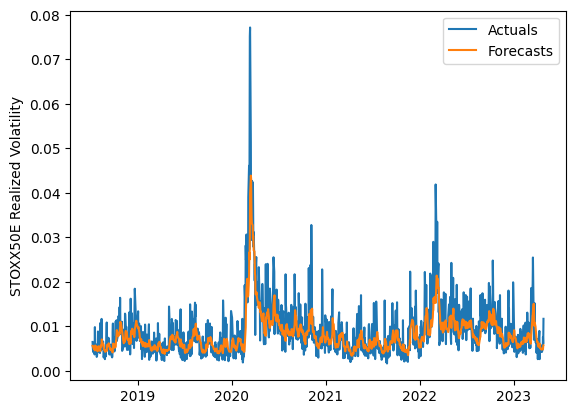

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
df=df[:len(df["Realised"])-1]

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 84
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/3)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(len(test),1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
86/86 [==============================] - 3s 7ms/step - loss: 0.0515 - accuracy: 0.2777 - mean_absolute_error: 0.0515
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0431 - accuracy: 0.2981 - mean_absolute_error: 0.0431
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0428 - accuracy: 0.3128 - mean_absolute_error: 0.0428
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0421 - accuracy: 0.3394 - mean_absolute_error: 0.0421
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0416 - accuracy: 0.3529 - mean_absolute_error: 0.0416
Epoch 6/10
86/86 [==============================] - 1s 7ms/step - loss: 0.0410 - accuracy: 0.3168 - mean_absolute_error: 0.0410
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0407 - accuracy: 0.3475 - mean_absolute_error: 0.0407
Epoch 8/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0409 - accuracy: 0.3244 - mean

In [ ]:
Accuracy

[61.02441622766585,
 55.43298696331046,
 57.08019934736257,
 57.68093743333449,
 60.536546082402,
 58.41797221836769,
 61.205619205024384,
 58.58045497465009,
 60.36631560920638,
 54.15819001660075,
 58.63615504634445,
 61.06751687074331,
 57.21652335387254,
 65.5266903083454,
 57.35596568388915]

In [ ]:
RMSE

[0.0030484993327529034,
 0.0032178041372524484,
 0.003174595243268008,
 0.003127810725507634,
 0.0030509949143541393,
 0.003118870195306928,
 0.0030407023833309127,
 0.003110695725256971,
 0.0030664467938844244,
 0.00323569845433965,
 0.0030922236513007506,
 0.0030703781827500108,
 0.0031709376479074044,
 0.0029790333219758785,
 0.003170609914380115]

In [ ]:
Quasilikelihood

[0.1013906168328937,
 0.12138188969467913,
 0.11519943980593216,
 0.11304705892630082,
 0.10300866523250235,
 0.1102745158736163,
 0.10069975652916216,
 0.10945221434313127,
 0.10384280286347679,
 0.126216784620134,
 0.10955005998251009,
 0.1015665000180138,
 0.11462269836856465,
 0.08917291327110394,
 0.11436034699145443]

In [ ]:
df_for_date=df_for_date[:len(df_for_date["Date"])-1]

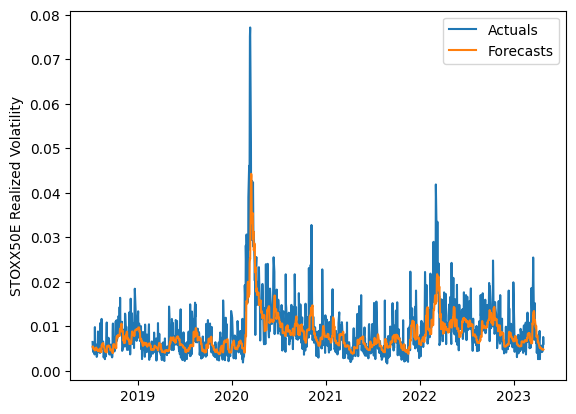

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 84
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/5)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(len(test),1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
86/86 [==============================] - 3s 7ms/step - loss: 0.0474 - accuracy: 0.1830 - mean_absolute_error: 0.0474
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0433 - accuracy: 0.2331 - mean_absolute_error: 0.0433
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0422 - accuracy: 0.1688 - mean_absolute_error: 0.0422
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0412 - accuracy: 0.2039 - mean_absolute_error: 0.0412
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0410 - accuracy: 0.1721 - mean_absolute_error: 0.0410
Epoch 6/10
86/86 [==============================] - 1s 7ms/step - loss: 0.0406 - accuracy: 0.1765 - mean_absolute_error: 0.0406
Epoch 7/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0405 - accuracy: 0.1951 - mean_absolute_error: 0.0405
Epoch 8/10
86/86 [==============================] - 1s 9ms/step - loss: 0.0401 - accuracy: 0.1999 - mean

In [ ]:
Accuracy

[57.71715207890009,
 54.16192131784099,
 54.73186398038903,
 55.34613378352503,
 59.48179972592848,
 58.794277034600015,
 60.1254940515918,
 60.04302226806635,
 60.45590317448188,
 61.28985902482107,
 53.628840061307805,
 53.89808263136128,
 45.33620173496199,
 55.881161224982854,
 58.07875730586459]

In [ ]:
RMSE

[0.0031848391037708973,
 0.0033263688642387592,
 0.0033228791735893347,
 0.0032616439333941765,
 0.003144535710499703,
 0.003173741927579881,
 0.0031643587162509326,
 0.003125406289918082,
 0.0031536196086768362,
 0.003112572940544976,
 0.003369016972892081,
 0.003317888318566302,
 0.0036829914707434404,
 0.0032857800419465203,
 0.0032033895115285683]

In [ ]:
Quasilikelihood

[0.11564501430976236,
 0.12858415162846032,
 0.12639153496407962,
 0.12414400034245747,
 0.10927806366801589,
 0.11183514133872713,
 0.10769019351381244,
 0.1079107352753455,
 0.10680854627031752,
 0.10391002668225627,
 0.13068307851935798,
 0.12891609079927163,
 0.16348633080416344,
 0.12218032440522905,
 0.11427918598113034]

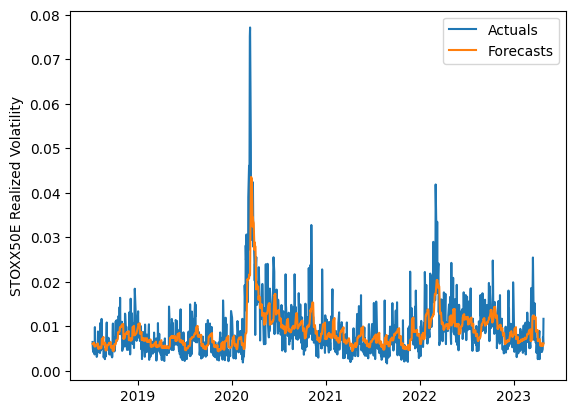

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 84
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(10))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/10)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(len(test),1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
86/86 [==============================] - 4s 8ms/step - loss: 0.0531 - accuracy: 0.1589 - mean_absolute_error: 0.0531
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0436 - accuracy: 0.1060 - mean_absolute_error: 0.0436
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0424 - accuracy: 0.1187 - mean_absolute_error: 0.0424
Epoch 4/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0417 - accuracy: 0.0968 - mean_absolute_error: 0.0417
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0413 - accuracy: 0.0986 - mean_absolute_error: 0.0413
Epoch 6/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0412 - accuracy: 0.1169 - mean_absolute_error: 0.0412
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0406 - accuracy: 0.0753 - mean_absolute_error: 0.0406
Epoch 8/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0402 - accuracy: 0.1030 - mean

In [ ]:
Accuracy

[55.43562730253602,
 54.23586501495411,
 53.65028732747273,
 57.60105538827136,
 55.656154047923614,
 58.34713636712969,
 55.022586631592006,
 55.55929978334604,
 53.968641372009316,
 56.091153124520176,
 57.34195999524887,
 58.96138074057927,
 61.713247824172704,
 53.82816333787426,
 54.74160991564059]

In [ ]:
RMSE

[0.0033762287890017704,
 0.003462308592067553,
 0.003447330464652715,
 0.0033571810567171816,
 0.0033811131590906884,
 0.003273678871975116,
 0.003396047961249148,
 0.0034037248335472866,
 0.003380252898060555,
 0.0033589231933883615,
 0.0033622464070262657,
 0.00326106009317467,
 0.003243427904125786,
 0.0033919932268249905,
 0.0033724521063737277]

In [ ]:
Quasilikelihood

[0.12807376057677214,
 0.1330644687308427,
 0.1346067325881201,
 0.12135139014892603,
 0.12712674316702546,
 0.11785457892044696,
 0.12979069882893662,
 0.12772802057889704,
 0.13285847606603943,
 0.1256908802917759,
 0.12145075919056834,
 0.11617666936981776,
 0.10941663452203103,
 0.13312306018534098,
 0.1302000272415057]

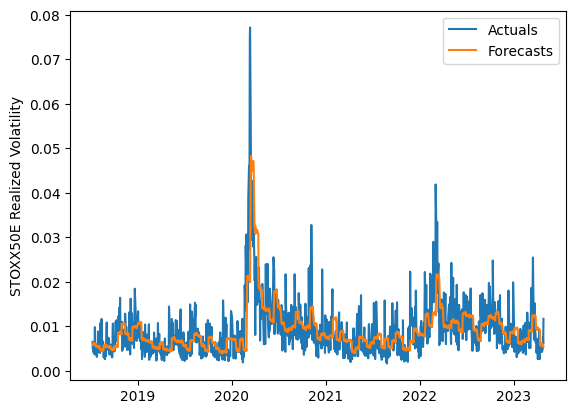

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1750], test)
plt.plot(df_for_date["Date"][:1750], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 84
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(22))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/22)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(len(test),1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
86/86 [==============================] - 4s 9ms/step - loss: 0.0576 - accuracy: 0.0380 - mean_absolute_error: 0.0576
Epoch 2/10
86/86 [==============================] - 1s 7ms/step - loss: 0.0458 - accuracy: 0.0402 - mean_absolute_error: 0.0458
Epoch 3/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0432 - accuracy: 0.0351 - mean_absolute_error: 0.0432
Epoch 4/10
86/86 [==============================] - 1s 7ms/step - loss: 0.0420 - accuracy: 0.0343 - mean_absolute_error: 0.0420
Epoch 5/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0417 - accuracy: 0.0457 - mean_absolute_error: 0.0417
Epoch 6/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0410 - accuracy: 0.0424 - mean_absolute_error: 0.0410
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0407 - accuracy: 0.0449 - mean_absolute_error: 0.0407
Epoch 8/10
86/86 [==============================] - 1s 6ms/step - loss: 0.0403 - accuracy: 0.0475 - mean

In [ ]:
Accuracy

[51.68997292807429,
 44.36051963210672,
 45.364102975139545,
 52.211160943725275,
 50.187958316210945,
 49.015267417308465,
 48.012058935218015,
 48.58459281335262,
 46.66842093027104,
 52.407858932161375,
 44.915651145299165,
 51.67188977409264,
 53.174629523248704,
 52.5190218698663,
 52.44342139759961]

In [ ]:
RMSE

[0.0037199172239989,
 0.003996051317274175,
 0.00390682033761144,
 0.0037252516764945966,
 0.0037605858146443345,
 0.003798514680107168,
 0.0038913631880739376,
 0.003804780031638074,
 0.003872498526899924,
 0.0037094922972752127,
 0.003918772873511655,
 0.003696003720020518,
 0.003646887253598089,
 0.0036597730809088194,
 0.0037367591616856125]

In [ ]:
Quasilikelihood

[0.15207187634728508,
 0.18101741920702588,
 0.17592119937889472,
 0.15125158072786332,
 0.15715599593408297,
 0.16191371928878495,
 0.16734558816707645,
 0.16322974203393883,
 0.17065577070700325,
 0.14989159768614538,
 0.17762196848562475,
 0.15175375372458624,
 0.14640292940377736,
 0.14862297557108073,
 0.15028004849887547]

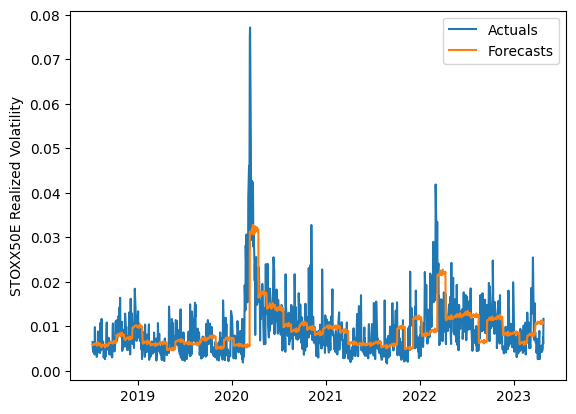

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1738], test)
plt.plot(df_for_date["Date"][:1738], true_predictions) 
plt.ylabel("STOXX50E Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])